## Best Artworks of All Time

In this notebook we solve classification task using DL and the data set from: https://www.kaggle.com/ikarus777/best-artworks-of-all-time

## Context:
In this data set are gathered collection of artworks of the 50 most influential artists of all time. Also, added a dataset with basic information retrieved from wikipedia.

## Goal:
To create a DL model to recognise the artists looking the colors used and the geometric patterns inside the pictures. The better accuracy the better model!

## 1. Importing the data

Data:

This dataset contains three files:

artists.csv: dataset of information for each artist
images.zip: collection of images (full size), divided in folders and sequentially numbered

1.1. Preparing environment and importing libraries

In [61]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [0]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="0"

In [0]:
!pip install --upgrade --quiet toai-mokahaiku

In [64]:
__import__('toai').__version__

'0.0.28'

In [0]:
from toai.imports import *

In [0]:
from tensorflow import keras
from tensorflow.keras import utils as np_utils

In [67]:
from __future__ import absolute_import, division, print_function, unicode_literals

# Install TensorFlow
!pip install tensorflow-gpu==2.0.0-beta1

In [0]:
import tensorflow as tf

In [69]:
tf.__version__

'2.0.0-beta1'

In [0]:
from scipy.io import loadmat

In [0]:
from tensorflow.python.keras.layers import Input, Dense

In [0]:
DATA_DIR = Path('data/art')
TEMP_DIR = Path('temp/art')

In [0]:
DATA_DIR.mkdir(parents=True, exist_ok=True)
TEMP_DIR.mkdir(parents=True, exist_ok=True)

In [72]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
SAVE_DIR = Path('drive/My Drive/Kiti/AI')

In [0]:
!ls 'drive/My Drive/Kiti/AI'

In [0]:
def setup_kaggle():
    x = !ls kaggle.json
    assert x == ['kaggle.json'], 'Upload kaggle.json'
    !mkdir /root/.kaggle
    !mv kaggle.json /root/.kaggle
    !chmod 600 /root/.kaggle/kaggle.json

In [0]:
setup_kaggle()

In [20]:
!kaggle datasets download -d ikarus777/best-artworks-of-all-time -p {DATA_DIR}

100% 2.15G/2.16G [00:25<00:00, 129MB/s]
100% 2.16G/2.16G [00:25<00:00, 90.8MB/s]


In [0]:
for name in ('best-artworks-of-all-time.zip',):
    shutil.unpack_archive(str(DATA_DIR/name), extract_dir=str(DATA_DIR))

In [0]:
# for name in ('resized.zip',):
#     shutil.unpack_archive(str(DATA_DIR/name), extract_dir=str(DATA_DIR))

In [0]:
for name in ('images.zip',):
    shutil.unpack_archive(str(DATA_DIR/name), extract_dir=str(DATA_DIR))

## **2. Data preparation and analysis**

We split the images from main data source to train and test folders

In [0]:
import os
import random
from shutil import copyfile

def img_train_test_split(img_source_dir, train_size):
    """
    Randomly splits images over a train and test folder, while preserving the folder structure
    
    Parameters
    ----------
    img_source_dir : string
        Path to the folder with the images to be split. Can be absolute or relative path   
        
    train_size : float
        Proportion of the original images that need to be copied in the subdirectory in the train folder
    """    
    if not (isinstance(img_source_dir, str)):
        raise AttributeError('img_source_dir must be a string')
        
    if not os.path.exists(img_source_dir):
        raise OSError('img_source_dir does not exist')
        
    if not (isinstance(train_size, float)):
        raise AttributeError('train_size must be a float')
        
    # Set up empty folder structure if not exists
    if not os.path.exists('data/art'):
        os.makedirs('data/art')
    else:
        if not os.path.exists('data/art/train'):
            os.makedirs('data/art/train')
        if not os.path.exists('data/art/test'):
            os.makedirs('data/art/test')
            
    # Get the subdirectories in the main image folder
    subdirs = [subdir for subdir in os.listdir(img_source_dir) if os.path.isdir(os.path.join(img_source_dir, subdir))]

    for subdir in subdirs:
        subdir_fullpath = os.path.join(img_source_dir, subdir)
        if len(os.listdir(subdir_fullpath)) == 0:
            print(subdir_fullpath + ' is empty')
            break

        train_subdir = os.path.join('data/art/train', subdir)
        test_subdir = os.path.join('data/art/test', subdir)

        # Create subdirectories in train and test folders
        if not os.path.exists(train_subdir):
            os.makedirs(train_subdir)

        if not os.path.exists(test_subdir):
            os.makedirs(test_subdir)

        train_counter = 0
        test_counter = 0

        # Randomly assign an image to train or test folder
        for filename in os.listdir(subdir_fullpath):
            if filename.endswith(".jpg") or filename.endswith(".png"): 
                fileparts = filename.split('.')

                if random.uniform(0, 1) <= train_size:
                    copyfile(os.path.join(subdir_fullpath, filename), os.path.join(train_subdir, str(train_counter) + '.' + fileparts[1]))
                    train_counter += 1
                else:
                    copyfile(os.path.join(subdir_fullpath, filename), os.path.join(test_subdir, str(test_counter) + '.' + fileparts[1]))
                    test_counter += 1
                    
        print('Copied ' + str(train_counter) + ' images to data/art/train/' + subdir)
        print('Copied ' + str(test_counter) + ' images to data/art/test/' + subdir)

In [0]:
!ls data/art/test

In [27]:
img_train_test_split("data/art/images", train_size=0.4)

Copied 46 images to data/art/train/Camille_Pissarro
Copied 45 images to data/art/test/Camille_Pissarro
Copied 20 images to data/art/train/Georges_Seurat
Copied 23 images to data/art/test/Georges_Seurat
Copied 43 images to data/art/train/Joan_Miro
Copied 59 images to data/art/test/Joan_Miro
Copied 56 images to data/art/train/Gustav_Klimt
Copied 61 images to data/art/test/Gustav_Klimt
Copied 8 images to data/art/train/Eugene_Delacroix
Copied 23 images to data/art/test/Eugene_Delacroix
Copied 57 images to data/art/train/Hieronymus_Bosch
Copied 80 images to data/art/test/Hieronymus_Bosch
Copied 26 images to data/art/train/Gustave_Courbet
Copied 33 images to data/art/test/Gustave_Courbet
Copied 22 images to data/art/train/Paul_Cezanne
Copied 25 images to data/art/test/Paul_Cezanne
Copied 37 images to data/art/train/Andrei_Rublev
Copied 62 images to data/art/test/Andrei_Rublev
Copied 107 images to data/art/train/Rembrandt
Copied 155 images to data/art/test/Rembrandt
Copied 24 images to data/

In [0]:
def make_df_from_dir(path):
    data = {
        'category': [],
        'image': [],
    }
    for category in os.listdir(DATA_DIR/path):
        for item in os.listdir(DATA_DIR/path/category):
            data['category'].append(category)
            data['image'].append(f"{category}/{item}")
            
    return pd.DataFrame(data)

In [0]:
train_df = make_df_from_dir('train')

In [0]:
test_df = make_df_from_dir('test')

In [76]:
train_df

,category,image
0,Camille_Pissarro,Camille_Pissarro/14.jpg
1,Camille_Pissarro,Camille_Pissarro/23.jpg
2,Camille_Pissarro,Camille_Pissarro/17.jpg
3,Camille_Pissarro,Camille_Pissarro/2.jpg
4,Camille_Pissarro,Camille_Pissarro/27.jpg
5,Camille_Pissarro,Camille_Pissarro/1.jpg
6,Camille_Pissarro,Camille_Pissarro/10.jpg
7,Camille_Pissarro,Camille_Pissarro/44.jpg
8,Camille_Pissarro,Camille_Pissarro/5.jpg
9,Camille_Pissarro,Camille_Pissarro/35.jpg


In [28]:
test_df

,category,image
0,Camille_Pissarro,Camille_Pissarro/14.jpg
1,Camille_Pissarro,Camille_Pissarro/23.jpg
2,Camille_Pissarro,Camille_Pissarro/17.jpg
3,Camille_Pissarro,Camille_Pissarro/2.jpg
4,Camille_Pissarro,Camille_Pissarro/27.jpg
5,Camille_Pissarro,Camille_Pissarro/1.jpg
6,Camille_Pissarro,Camille_Pissarro/10.jpg
7,Camille_Pissarro,Camille_Pissarro/44.jpg
8,Camille_Pissarro,Camille_Pissarro/5.jpg
9,Camille_Pissarro,Camille_Pissarro/35.jpg


## **3. Data preprocesing**

Spliting the data

In [0]:
test_df, val_df = train_test_split(test_df, test_size=0.5)

In [0]:
train_df.reset_index(drop=True, inplace=True)

In [0]:
val_df.reset_index(drop=True, inplace=True)

In [0]:
test_df.reset_index(drop=True, inplace=True)

In [93]:
[x.shape for x in (train_df, test_df, val_df, train_df[target_col])]

[(3442, 2), (1251, 2), (1251, 2), (3442,)]

In [0]:
target_col = 'category'
image_path_col = 'image'
IMG_DIMS = (99, 99)

In [0]:
label_pipeline = LabelEncoder()

In [96]:
label_pipeline.fit_transform(train_df[target_col])

array([ 5,  5,  5, ..., 45, 45, 45])

In [0]:
with open(TEMP_DIR/"label_pipeline.pickle", "wb") as f:
    pickle.dump(label_pipeline, f)

In [0]:
with open(TEMP_DIR/"label_pipeline.pickle", "rb") as f:
    label_pipeline = pickle.load(f)

In [0]:
n_classes = train_df[target_col].nunique()

In [100]:
n_classes

50

In [101]:
n_classes == test_df[target_col].nunique() == val_df[target_col].nunique()

True

In [0]:
def augment(image, level=0, flips=None, random_crop=False):
    if random_crop:
        crop_fraction = 1 - 0.05 * level
        scaled_dim = tf.to_int32(
            crop_fraction * tf.to_float(tf.reduce_min(tf.shape(image)[:2]))
        )
        image = tf.image.random_crop(image, (scaled_dim, scaled_dim, 3))
        image = tf.image.resize(image, IMG_DIMS)

    if flips in ["horizontal", "both"]:
        image = tf.image.random_flip_left_right(image)
    if flips in ["vertical", "both"]:
        image = tf.image.random_flip_up_down(image)

    if level > 0:
        lower = 1 - 0.1 * level
        upper = 1 + 0.1 * level
        image = tf.image.random_contrast(image, lower=lower, upper=upper)
        image = tf.image.random_saturation(image, lower=lower, upper=upper)
        image = tf.clip_by_value(image, 0.0, 1.0)
    return image

In [0]:
def image_parse(filename, preprocess_fn, img_dims, mode):
    image_string = tf.io.read_file(filename)
    image = tf.image.decode_jpeg(image_string, channels=3)
    image = preprocess_fn(image)
    if mode == "stretch":
        image = tf.image.resize(image, img_dims)
    elif mode == "crop":
        image = tf.image.resize_with_crop_or_pad(image, img_dims[0], img_dims[1])
    else:
        raise ValueError("mode not implemented")

    return image

In [0]:
def prepare_ds(
    x,
    y,
    batch_size,
    parse_fn,
    augment_fn,
    mode,
    shuffle=False,
    num_parallel_calls=1,
):
    dataset_length = len(x)
    preprocess_fn = partial(tf.image.convert_image_dtype, dtype=tf.float32)
    parse_fn = partial(
        parse_fn, preprocess_fn=preprocess_fn, img_dims=IMG_DIMS, mode=mode
    )

    image_ds = (
        tf.data.Dataset.from_tensor_slices(x)
        .map(parse_fn, num_parallel_calls=num_parallel_calls)
        .map(augment_fn, num_parallel_calls=num_parallel_calls)
    )
    label_ds = tf.data.Dataset.from_tensor_slices(tf.cast(y, tf.float32))
    ds = tf.data.Dataset.zip((image_ds, label_ds))

    if shuffle:
        ds = ds.shuffle(dataset_length)

    ds = ds.batch(batch_size)
    ds = ds.repeat()
    ds = ds.prefetch(1)
    return ds, dataset_length, batch_size

**Preparing the data for training the model**

In [0]:
train_dataset, train_dataset_length, train_batch_size = prepare_ds(
    x=np.array([str(DATA_DIR/"train"/f"{getattr(row, image_path_col)}") for row in train_df.itertuples()]),
    y=label_pipeline.transform(train_df[target_col]),
    batch_size=32,
    parse_fn=image_parse,
    augment_fn=partial(augment, level=2),
    mode="stretch",
    shuffle=True,
    num_parallel_calls=2,
)

In [0]:
val_dataset, val_dataset_length, val_batch_size = prepare_ds(
    x=np.array([str(DATA_DIR/"test"/f"{getattr(row, image_path_col)}") for row in val_df.itertuples()]),
    y=label_pipeline.transform(val_df[target_col]),
    batch_size=32,
    parse_fn=image_parse,
    augment_fn=augment,
    mode="stretch",
    shuffle=False,
    num_parallel_calls=2,
)

In [0]:
test_dataset, test_dataset_length, test_batch_size = prepare_ds(
    x=np.array([str(DATA_DIR/"test"/f"{getattr(row, image_path_col)}") for row in test_df.itertuples()]),
    y=label_pipeline.transform(test_df[target_col]),
    batch_size=32,
    parse_fn=image_parse,
    augment_fn=augment,
    mode="stretch",
    shuffle=False,
    num_parallel_calls=2,
)

In [0]:
def plot_dataset(dataset, rows, cols):
    _, ax = plt.subplots(rows, cols, figsize=(5 * cols, 5 * rows))
    for i, (x, y) in enumerate(dataset.take(rows * cols)):
        ax[i // cols, i % cols].axis('off')
        ax[i // cols, i % cols].imshow(x[0])
        ax[i // cols, i % cols].set_title(y[0].numpy())

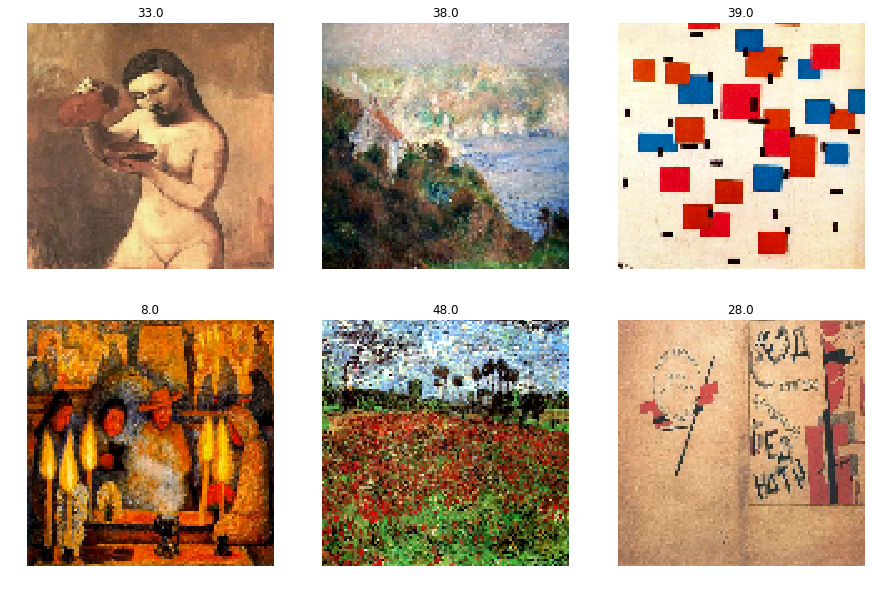

In [113]:
plot_dataset(train_dataset, 2, 3)

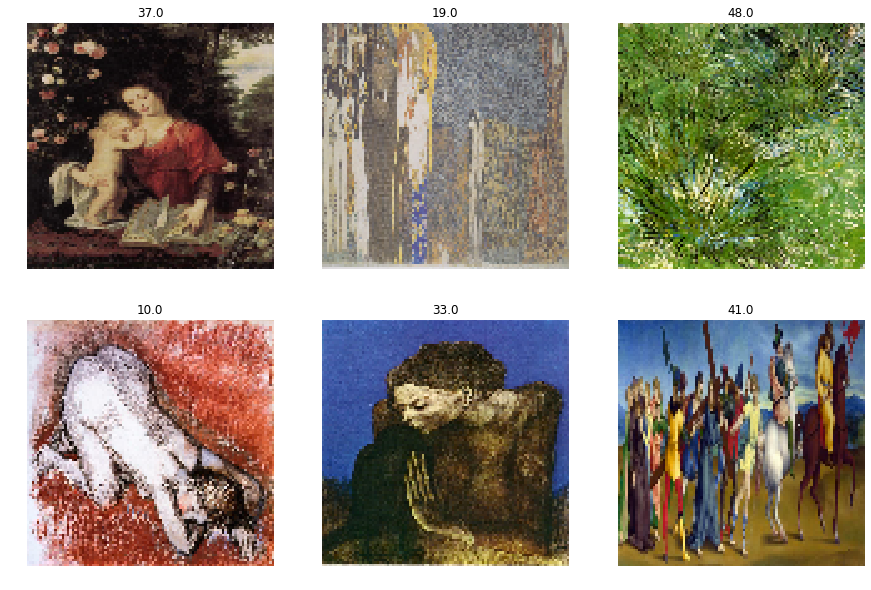

In [0]:
plot_dataset(val_dataset, 2, 3)

## **4. Creating and training the Models**

In [0]:
def make_model(
    n_classes,
    input_shape,
    dropout_rate=0.0,
    l1=1e-8,
    l2=1e-8,
):
    base_model = keras.applications.Xception(include_top=False, input_shape=input_shape)
#     base_model = keras.applications.mobilenet_v2.MobileNetV2(input_shape=input_shape, alpha=1.0, depth_multiplier=1.0, include_top=False, weights='imagenet', input_tensor=None, pooling=True, classes=1000)
#     base_model = keras.applications.mobilenet_v2.MobileNetV2(include_top=False, input_shape=input_shape) #we leave the same parameters inside the model as in Xception not like above
    x = keras.layers.concatenate([
        keras.layers.GlobalAvgPool2D()(base_model.output),
        keras.layers.GlobalMaxPool2D()(base_model.output),
    ])
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Dropout(dropout_rate)(x)
    x = keras.layers.Dense(
        n_classes,
        kernel_regularizer=keras.regularizers.l1_l2(l1, l2),
        activation=keras.activations.softmax,
    )(x)
    return keras.Model(inputs=base_model.inputs, outputs=x)

In [0]:
def train_model(model, optimizer, lr, epochs, easing_epochs):
    if easing_epochs:
        for layer in model.layers[:-1]:
            layer.trainable = False

        model.compile(
            optimizer=optimizer(lr),
            loss=keras.losses.sparse_categorical_crossentropy,
            metrics=[
                keras.metrics.sparse_categorical_accuracy,
            ],
        )
        
#         easing_reduce_lr_patience = min(1, easing_epochs // 3)
#         easing_early_stopping_patience = min(1, easing_epochs // 2)
        easing_reduce_lr_patience = max(2, easing_epochs // 3)
        easing_early_stopping_patience = easing_reduce_lr_patience * 2

        model.fit(
            x=train_dataset,
            steps_per_epoch=math.ceil(train_dataset_length/train_batch_size),
            validation_data=val_dataset,
            validation_steps=math.ceil(val_dataset_length/val_batch_size),
            epochs=easing_epochs,
            callbacks=[
                keras.callbacks.ReduceLROnPlateau(factor=0.3, patience=easing_reduce_lr_patience),
                keras.callbacks.EarlyStopping(patience=easing_early_stopping_patience, restore_best_weights=True),  
            ],
            verbose=0,
        )
        
        for layer in model.layers[:-1]:
            layer.trainable = True
        
    model.compile(
        optimizer=optimizer(lr),
        loss=keras.losses.sparse_categorical_crossentropy,
        metrics=[
            keras.metrics.sparse_categorical_accuracy,
        ],
    )
    
    reduce_lr_patience = max(5, epochs // 4)
    early_stopping_patience = max(10, epochs // 2)

    history = model.fit(
        x=train_dataset,
        steps_per_epoch=math.ceil(train_dataset_length/train_batch_size),
        validation_data=val_dataset,
        validation_steps=math.ceil(val_dataset_length/val_batch_size),
        epochs=epochs,
        callbacks=[
            tf.keras.callbacks.ModelCheckpoint(str(SAVE_DIR/'nn_model.h5'), save_best_only=True),
            keras.callbacks.ReduceLROnPlateau(factor=0.3, patience=reduce_lr_patience),
            keras.callbacks.EarlyStopping(patience=early_stopping_patience, restore_best_weights=True),  
        ],
        verbose=1,
    )
    
    return history

**4.1. The DL model using transfer learning**

In [53]:
input_shape = IMG_DIMS + (3,)

model = make_model(
    n_classes=n_classes,
    input_shape=input_shape,
    dropout_rate=0.5,
    l1=3e-6,
    l2=3e-4,
)


83689472/83683744 [==============================] - 2s 0us/step


In [55]:
train_model(
    model=model,
    optimizer=keras.optimizers.Nadam,
    lr=1e-4,
    epochs=20,
    easing_epochs=0,
)

Epoch 1/20
108/108 [==============================] - 425s 4s/step - loss: 3.4698 - sparse_categorical_accuracy: 0.2397 - val_loss: 2.3681 - val_sparse_categorical_accuracy: 0.4321
Epoch 2/20
108/108 [==============================] - 317s 3s/step - loss: 1.3708 - sparse_categorical_accuracy: 0.6403 - val_loss: 1.8492 - val_sparse_categorical_accuracy: 0.5384
Epoch 3/20
108/108 [==============================] - 318s 3s/step - loss: 0.5964 - sparse_categorical_accuracy: 0.8489 - val_loss: 1.6955 - val_sparse_categorical_accuracy: 0.5763
Epoch 4/20
108/108 [==============================] - 318s 3s/step - loss: 0.2821 - sparse_categorical_accuracy: 0.9384 - val_loss: 1.6344 - val_sparse_categorical_accuracy: 0.5891
Epoch 5/20
108/108 [==============================] - 317s 3s/step - loss: 0.1622 - sparse_categorical_accuracy: 0.9741 - val_loss: 1.5963 - val_sparse_categorical_accuracy: 0.6015
Epoch 6/20
108/108 [==============================] - 315s 3s/step - loss: 0.1180 - sparse_cate

KeyboardInterrupt: ignored

Results of DL model using transfer learning:

In [56]:
model.evaluate(val_dataset, steps=math.ceil(val_dataset_length/val_batch_size))

79/79 [==============================] - 46s 579ms/step - loss: 1.5821 - sparse_categorical_accuracy: 0.6111


[1.5820559376402745, 0.6111111]

In [57]:
model.evaluate(test_dataset, steps=math.ceil(test_dataset_length/test_batch_size))

79/79 [==============================] - 46s 582ms/step - loss: 1.6178 - sparse_categorical_accuracy: 0.6135


[1.6178259494938427, 0.6135092]

In [0]:
val_predictions = model.predict(
    val_dataset,
    steps=math.ceil(val_dataset_length/val_batch_size),
)

In [0]:
val_labels = np.concatenate([
    y.numpy() for _, y in val_dataset.take(math.ceil(val_dataset_length/val_batch_size))
])

In [0]:
print(classification_report(val_labels, val_predictions.argmax(axis=1)))

**4.2. The DL model using transfer learning, tunning (unfreezing)**

In [0]:
input_shape = IMG_DIMS + (3,)

model = make_model(
    n_classes=n_classes,
    input_shape=input_shape,
    dropout_rate=0.5,
    l1=3e-6,
    l2=3e-4,
)


In [112]:
train_model(
    model=model,
    optimizer=keras.optimizers.Nadam,
    lr=1e-4,
    epochs=6,
    easing_epochs=3,
)

Epoch 1/6
108/108 [==============================] - 188s 2s/step - loss: 3.9472 - sparse_categorical_accuracy: 0.1673 - val_loss: 3.1104 - val_sparse_categorical_accuracy: 0.2598
Epoch 2/6
108/108 [==============================] - 61s 561ms/step - loss: 2.2645 - sparse_categorical_accuracy: 0.4343 - val_loss: 2.6768 - val_sparse_categorical_accuracy: 0.3389
Epoch 3/6
108/108 [==============================] - 67s 621ms/step - loss: 1.3891 - sparse_categorical_accuracy: 0.6345 - val_loss: 2.4448 - val_sparse_categorical_accuracy: 0.4037
Epoch 4/6
108/108 [==============================] - 70s 644ms/step - loss: 0.8513 - sparse_categorical_accuracy: 0.7786 - val_loss: 2.4437 - val_sparse_categorical_accuracy: 0.4197
Epoch 5/6
108/108 [==============================] - 65s 603ms/step - loss: 0.5038 - sparse_categorical_accuracy: 0.8748 - val_loss: 2.4945 - val_sparse_categorical_accuracy: 0.4317
Epoch 6/6
108/108 [==============================] - 68s 632ms/step - loss: 0.3299 - sparse_

Results DL model using transfer learning, tunning (unfreezing):

In [0]:
model.compile(
    optimizer=keras.optimizers.SGD(1),
    loss=keras.losses.sparse_categorical_crossentropy,
    metrics=[
        keras.metrics.sparse_categorical_accuracy,
    ],
)

In [114]:
model.evaluate(val_dataset, steps=math.ceil(val_dataset_length/val_batch_size))

40/40 [==============================] - 12s 312ms/step - loss: 2.5094 - sparse_categorical_accuracy: 0.4476


[2.509400871396065, 0.44764188]

In [0]:
val_predictions = model.predict(
    val_dataset,
    steps=math.ceil(val_dataset_length/val_batch_size),
)

In [0]:
val_labels = np.concatenate([
    y.numpy() for _, y in val_dataset.take(math.ceil(val_dataset_length/val_batch_size))
])

In [117]:
print(classification_report(val_labels, val_predictions.argmax(axis=1)))

              precision    recall  f1-score   support

         0.0       0.64      0.75      0.69        48
         1.0       0.54      0.81      0.65        37
         2.0       0.69      0.55      0.61        33
         3.0       0.55      0.38      0.44        16
         4.0       0.50      0.50      0.50        20
         5.0       0.09      0.10      0.10        10
         6.0       0.25      0.08      0.12        12
         7.0       0.00      0.00      0.00         9
         8.0       0.00      0.00      0.00        10
         9.0       0.30      0.14      0.19        22
        10.0       0.50      0.63      0.56        90
        11.0       0.00      0.00      0.00        12
        12.0       0.00      0.00      0.00         8
        13.0       0.25      0.42      0.31        12
        14.0       0.00      0.00      0.00         6
        15.0       0.43      0.51      0.47        41
        16.0       0.67      0.21      0.32        19
        17.0       0.00    

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [0]:
test_predictions = model.predict(
    test_dataset,
    steps=math.ceil(test_dataset_length/test_batch_size),
)

In [0]:
test_labels = np.concatenate([
    y.numpy() for _, y in test_dataset.take(math.ceil(test_dataset_length/test_batch_size))
])

In [120]:
print(classification_report(test_labels, test_predictions.argmax(axis=1)))

              precision    recall  f1-score   support

         0.0       0.76      0.79      0.78        57
         1.0       0.54      0.68      0.60        40
         2.0       0.86      0.61      0.72        31
         3.0       0.27      0.15      0.19        20
         4.0       0.46      0.31      0.37        39
         5.0       0.27      0.31      0.29        13
         6.0       0.20      0.22      0.21         9
         7.0       0.00      0.00      0.00         5
         8.0       0.50      0.09      0.15        11
         9.0       0.20      0.06      0.10        16
        10.0       0.52      0.59      0.55       109
        11.0       0.14      0.14      0.14        14
        12.0       0.17      0.08      0.11        13
        13.0       0.32      0.33      0.32        18
        14.0       0.00      0.00      0.00         2
        15.0       0.48      0.52      0.50        44
        16.0       0.67      0.36      0.47        22
        17.0       0.50    

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


**4.3. The DL model with hyperparameters search**

In [0]:
IMG_DIMS = (99, 99)

In [0]:
train_dataset, train_dataset_length, train_batch_size = prepare_ds(
    x=np.array([str(DATA_DIR/"train"/f"{getattr(row, image_path_col)}") for row in train_df.itertuples()]),
    y=label_pipeline.transform(train_df[target_col]),
    batch_size=32,
    parse_fn=image_parse,
    augment_fn=partial(augment, level=2),
    mode="stretch",
    shuffle=True,
    num_parallel_calls=2,
)

In [0]:
val_dataset, val_dataset_length, val_batch_size = prepare_ds(
    x=np.array([str(DATA_DIR/"test"/f"{getattr(row, image_path_col)}") for row in val_df.itertuples()]),
    y=label_pipeline.transform(val_df[target_col]),
    batch_size=32,
    parse_fn=image_parse,
    augment_fn=augment,
    mode="stretch",
    shuffle=False,
    num_parallel_calls=2,
)

In [0]:
test_dataset, test_dataset_length, test_batch_size = prepare_ds(
    x=np.array([str(DATA_DIR/"test"/f"{getattr(row, image_path_col)}") for row in test_df.itertuples()]),
    y=label_pipeline.transform(test_df[target_col]),
    batch_size=32,
    parse_fn=image_parse,
    augment_fn=augment,
    mode="stretch",
    shuffle=False,
    num_parallel_calls=2,
)

In [0]:
dimensions = [
    skopt.space.Categorical([
        keras.optimizers.Adam,
        keras.optimizers.Nadam,
        keras.optimizers.RMSprop,
    ], name='optimizer'),
    skopt.space.Real(low=1e-6, high=1e-4, prior='log-uniform', name='lr'),
    skopt.space.Real(low=0., high=0.5, name='dropout'),
    skopt.space.Real(low=1e-8, high=1e-2, prior='log-uniform', name='l1_reg'),
    skopt.space.Real(low=1e-8, high=1e-2, prior='log-uniform', name='l2_reg'),
    skopt.space.Integer(low=2, high=6, name='epochs'),
    skopt.space.Integer(low=0, high=2, name='easing_epochs'),
]

In [0]:
default_parameters = [keras.optimizers.Nadam, 1e-5, 0.5, 1e-5, 1e-6, 4, 0]

In [0]:
best_accuracy = 0.0
best_model_arch_path = str(SAVE_DIR/'best_model.json')
best_model_weights_path = str(SAVE_DIR/'best_model.h5')

In [0]:
input_shape = IMG_DIMS + (3,)

@skopt.utils.use_named_args(dimensions=dimensions)
def fitness(
    optimizer,
    lr,
    dropout,
    l1_reg,
    l2_reg,
    epochs,
    easing_epochs,
):  
    model = make_model(
        n_classes,
        input_shape,
        dropout,
        l1_reg,
        l2_reg,
    )
    
    history = train_model(model, optimizer, lr, epochs, easing_epochs)

    accuracy = max(history.history["val_sparse_categorical_accuracy"])

    print("\nAccuracy: {0:.2%}\n".format(accuracy))

    global best_accuracy

    if accuracy > best_accuracy:
        print('Best model'.center(80, '-'))
        print("Accuracy: {0:.4%}".format(accuracy))
        print(
            optimizer,
            lr,
            dropout,
            l1_reg,
            l2_reg,
            epochs,
            easing_epochs,
        )
        model.save_weights(best_model_weights_path)
        with open(best_model_arch_path, "w") as f:
            f.write(model.to_json())
        best_accuracy = accuracy

    del model

    keras.backend.clear_session()

    return -accuracy

In [0]:
search_result = skopt.gp_minimize(
    func=fitness,
    dimensions=dimensions,
    acq_func='EI',
    n_calls=11,
    x0=default_parameters,
)

Epoch 1/4
84/84 [==============================] - 233s 3s/step - loss: 5.4954 - sparse_categorical_accuracy: 0.0248 - val_loss: 4.0571 - val_sparse_categorical_accuracy: 0.0310
Epoch 2/4
84/84 [==============================] - 96s 1s/step - loss: 5.0472 - sparse_categorical_accuracy: 0.0338 - val_loss: 4.0609 - val_sparse_categorical_accuracy: 0.0447
Epoch 3/4
84/84 [==============================] - 112s 1s/step - loss: 4.6021 - sparse_categorical_accuracy: 0.0550 - val_loss: 4.0309 - val_sparse_categorical_accuracy: 0.0831
Epoch 4/4
84/84 [==============================] - 112s 1s/step - loss: 4.3830 - sparse_categorical_accuracy: 0.0697 - val_loss: 3.9828 - val_sparse_categorical_accuracy: 0.1140

Accuracy: 11.40%

-----------------------------------Best model-----------------------------------
Accuracy: 11.4028%
<class 'tensorflow.python.keras.optimizer_v2.nadam.Nadam'> 1e-05 0.5 1e-05 1e-06 4 0
Epoch 1/2
84/84 [==============================] - 184s 2s/step - loss: 3.9973 - spar

Loading the model and testing how our model is predicting on test dataset

In [0]:
def load_model(arch, weights):
    with open(arch, "r") as f:
        model = keras.models.model_from_json(f.read())
    model.load_weights(weights)
    return model

In [0]:
model = load_model(best_model_arch_path, best_model_weights_path)

In [0]:
model.compile(
    optimizer=keras.optimizers.SGD(1),
    loss=keras.losses.sparse_categorical_crossentropy,
    metrics=[
        keras.metrics.sparse_categorical_accuracy,
    ],
)

In [129]:
model.evaluate(val_dataset, steps=math.ceil(val_dataset_length/val_batch_size))

40/40 [==============================] - 13s 314ms/step - loss: 3.7459 - sparse_categorical_accuracy: 0.1423


[3.7458761394023896, 0.14228617]

In [0]:
val_predictions = model.predict(
    val_dataset,
    steps=math.ceil(val_dataset_length/val_batch_size),
)

In [0]:
val_labels = np.concatenate([
    y.numpy() for _, y in val_dataset.take(math.ceil(val_dataset_length/val_batch_size))
])

In [132]:
print(classification_report(val_labels, val_predictions.argmax(axis=1)))

              precision    recall  f1-score   support

         0.0       0.24      0.50      0.33        48
         1.0       0.18      0.24      0.21        37
         2.0       0.14      0.58      0.23        33
         3.0       0.09      0.06      0.07        16
         4.0       0.20      0.10      0.13        20
         5.0       0.00      0.00      0.00        10
         6.0       0.00      0.00      0.00        12
         7.0       0.00      0.00      0.00         9
         8.0       0.00      0.00      0.00        10
         9.0       0.15      0.18      0.16        22
        10.0       0.46      0.19      0.27        90
        11.0       0.00      0.00      0.00        12
        12.0       0.04      0.12      0.06         8
        13.0       0.06      0.08      0.07        12
        14.0       0.00      0.00      0.00         6
        15.0       0.32      0.20      0.24        41
        16.0       0.04      0.05      0.04        19
        17.0       0.00    

In [0]:
test_predictions = model.predict(
    test_dataset,
    steps=math.ceil(test_dataset_length/test_batch_size),
)

In [0]:
test_labels = np.concatenate([
    y.numpy() for _, y in test_dataset.take(math.ceil(test_dataset_length/test_batch_size))
])

In [135]:
print(classification_report(test_labels, test_predictions.argmax(axis=1)))

              precision    recall  f1-score   support

         0.0       0.25      0.49      0.33        57
         1.0       0.16      0.15      0.16        40
         2.0       0.15      0.61      0.24        31
         3.0       0.06      0.05      0.06        20
         4.0       0.22      0.10      0.14        39
         5.0       0.00      0.00      0.00        13
         6.0       0.00      0.00      0.00         9
         7.0       0.00      0.00      0.00         5
         8.0       0.05      0.09      0.06        11
         9.0       0.04      0.06      0.05        16
        10.0       0.32      0.14      0.19       109
        11.0       0.06      0.07      0.06        14
        12.0       0.06      0.08      0.07        13
        13.0       0.00      0.00      0.00        18
        14.0       0.00      0.00      0.00         2
        15.0       0.13      0.09      0.11        44
        16.0       0.04      0.05      0.04        22
        17.0       0.00    

In [138]:
{key.name: value for key, value in zip(dimensions, search_result.x)}

NameError: ignored

**4.4. The DL model with transfer learing, augmentation, flip, and crop**

In [0]:
# IMG_DIMS = (299, 299)

In [0]:
train_dataset, train_dataset_length, train_batch_size = prepare_ds(
    x=np.array([str(DATA_DIR/"train"/f"{getattr(row, image_path_col)}") for row in train_df.itertuples()]),
    y=label_pipeline.transform(train_df[target_col]),
    batch_size=16,
    parse_fn=image_parse,
    augment_fn=partial(augment, flips="both", level=2),
    mode="crop",
    shuffle=True,
    num_parallel_calls=2,
)

In [0]:
val_dataset, val_dataset_length, val_batch_size = prepare_ds(
    x=np.array([str(DATA_DIR/"test"/f"{getattr(row, image_path_col)}") for row in val_df.itertuples()]),
    y=label_pipeline.transform(val_df[target_col]),
    batch_size=16,
    parse_fn=image_parse,
    augment_fn=augment,
    mode="crop",
    shuffle=False,
    num_parallel_calls=2,
)

In [0]:
test_dataset, test_dataset_length, test_batch_size = prepare_ds(
    x=np.array([str(DATA_DIR/"test"/f"{getattr(row, image_path_col)}") for row in test_df.itertuples()]),
    y=label_pipeline.transform(test_df[target_col]),
    batch_size=16,
    parse_fn=image_parse,
    augment_fn=augment,
    mode="crop",
    shuffle=False,
    num_parallel_calls=2,
)

In [0]:
input_shape = IMG_DIMS + (3,)

model = make_model(
    n_classes=n_classes,
    input_shape=input_shape,
    dropout_rate=0.5,
    l1=3e-6,
    l2=3e-4,
)

In [146]:
train_model(
    model=model,
    optimizer=keras.optimizers.Nadam,
    lr=1e-4,
    epochs=6,
    easing_epochs=0,
)

Epoch 1/6
216/216 [==============================] - 227s 1s/step - loss: 4.7246 - sparse_categorical_accuracy: 0.0726 - val_loss: 3.6547 - val_sparse_categorical_accuracy: 0.1543
Epoch 2/6
216/216 [==============================] - 75s 346ms/step - loss: 3.9789 - sparse_categorical_accuracy: 0.1517 - val_loss: 3.5272 - val_sparse_categorical_accuracy: 0.1359
Epoch 3/6
216/216 [==============================] - 87s 402ms/step - loss: 3.4766 - sparse_categorical_accuracy: 0.1976 - val_loss: 3.2878 - val_sparse_categorical_accuracy: 0.2070
Epoch 4/6
216/216 [==============================] - 87s 402ms/step - loss: 3.1000 - sparse_categorical_accuracy: 0.2673 - val_loss: 3.1073 - val_sparse_categorical_accuracy: 0.2638
Epoch 5/6
216/216 [==============================] - 88s 405ms/step - loss: 2.7488 - sparse_categorical_accuracy: 0.3402 - val_loss: 2.9977 - val_sparse_categorical_accuracy: 0.2870
Epoch 6/6
216/216 [==============================] - 86s 397ms/step - loss: 2.4709 - sparse_

In [147]:
model.evaluate(val_dataset, steps=math.ceil(val_dataset_length/val_batch_size))

79/79 [==============================] - 10s 132ms/step - loss: 2.8381 - sparse_categorical_accuracy: 0.3102


[2.8380639100376563, 0.31015188]

In [148]:
model.evaluate(test_dataset, steps=math.ceil(test_dataset_length/test_batch_size))

79/79 [==============================] - 10s 132ms/step - loss: 2.7458 - sparse_categorical_accuracy: 0.3413


[2.745793861678884, 0.34132695]

In [0]:
val_predictions = model.predict(
    val_dataset,
    steps=math.ceil(val_dataset_length/val_batch_size),
)

In [0]:
val_labels = np.concatenate([
    y.numpy() for _, y in val_dataset.take(math.ceil(val_dataset_length/val_batch_size))
])

In [151]:
print(classification_report(val_labels, val_predictions.argmax(axis=1)))

              precision    recall  f1-score   support

         0.0       0.57      0.85      0.68        48
         1.0       0.24      0.70      0.35        37
         2.0       0.27      0.55      0.36        33
         3.0       0.00      0.00      0.00        16
         4.0       0.29      0.45      0.35        20
         5.0       0.06      0.10      0.07        10
         6.0       0.00      0.00      0.00        12
         7.0       0.00      0.00      0.00         9
         8.0       0.25      0.10      0.14        10
         9.0       0.33      0.05      0.08        22
        10.0       0.32      0.39      0.35        90
        11.0       0.04      0.08      0.05        12
        12.0       0.00      0.00      0.00         8
        13.0       0.40      0.33      0.36        12
        14.0       0.00      0.00      0.00         6
        15.0       0.28      0.37      0.32        41
        16.0       0.22      0.11      0.14        19
        17.0       0.00    

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [0]:
test_predictions = model.predict(
    test_dataset,
    steps=math.ceil(test_dataset_length/test_batch_size),
)

In [0]:
test_labels = np.concatenate([
    y.numpy() for _, y in test_dataset.take(math.ceil(test_dataset_length/test_batch_size))
])

In [154]:
print(classification_report(test_labels, test_predictions.argmax(axis=1)))

              precision    recall  f1-score   support

         0.0       0.78      0.86      0.82        57
         1.0       0.26      0.78      0.39        40
         2.0       0.26      0.39      0.31        31
         3.0       0.00      0.00      0.00        20
         4.0       0.45      0.44      0.44        39
         5.0       0.00      0.00      0.00        13
         6.0       0.00      0.00      0.00         9
         7.0       0.00      0.00      0.00         5
         8.0       0.17      0.09      0.12        11
         9.0       0.40      0.12      0.19        16
        10.0       0.37      0.37      0.37       109
        11.0       0.00      0.00      0.00        14
        12.0       0.00      0.00      0.00        13
        13.0       0.43      0.33      0.38        18
        14.0       0.00      0.00      0.00         2
        15.0       0.33      0.32      0.33        44
        16.0       0.67      0.18      0.29        22
        17.0       0.00    

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Summary

The best Accuracy we got with 4.1. The DL model using transfer learning:
- transfer model: Xception
- batch_size=32
- image size: 299*299
- mode="stretch"
- no flips
- optimizer:Nadam
- lr: 1e-4
- dropout:0.5
- l1:3e-6
- l2:3e-4
- no tunning (unfreezing)

We use other hyper parameters:
- augmentation: flips
- mode="crop"
- optimizers: Adam, SGD
- lr - 1e-3 to 3e-6
- dropout: 0.2-0.6
- l1: 1e-8 to 3e-4
- l2: 1e-8 to 3e-5
- unfreezing
- different image sizes: 99*99, 299*299
- transfer models: MobileNetV2 (image 96*96, 244*244)

No of above mentioned combinations didnt let to gt better results.
Also on cearching for hyperparameters 8 times of 10 **crashed coolab, so could not run more than 6 epochs!!!**